<a href="https://colab.research.google.com/github/adaa1999/LSTM-MNIST-Classifier/blob/master/HDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
#maxpooling----adam--dropout---denselayer
#max pooling-it is the process of taking out the brightest or the largest number from an n*m array in an image numpy array and dropping out other values i.e we choose the highest intensity number
#dropout-processing of dropping out garbage value to overcome or avoid over fitting or under fitting

In [0]:
np.random.seed(0)

In [0]:
# loading mnist data set
data=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
dir(data)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [0]:
type(data)

tuple

In [0]:
len(data)

2

In [0]:
data[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [0]:
type(data[0])

tuple

In [0]:
len(data[0])

2

In [0]:
len(data[0][0])

60000

In [0]:
type(data[0][0])

numpy.ndarray

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
len(x_train)==len(y_train)

True

In [0]:
len(x_test)==len(y_test)

True

5

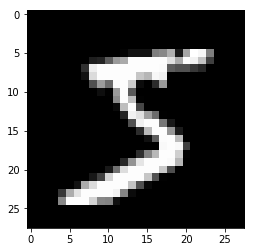

In [0]:
plt.imshow(x_train[0],cmap='gray')
y_train[0]

4

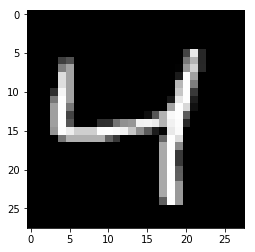

In [0]:
plt.imshow(x_train[2],cmap='gray')
y_train[2]

In [0]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
print(x_test.shape)

(10000, 28, 28)


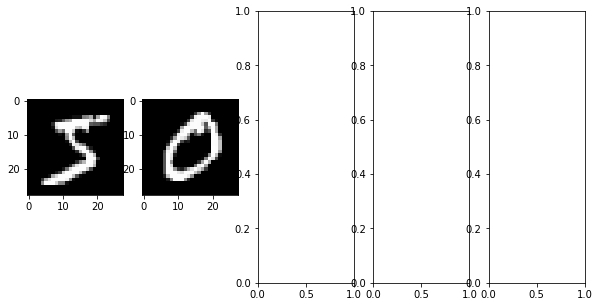

In [0]:
f,a=plt.subplots(1,5,figsize=(10,5))
a[0].imshow(x_train[0],cmap='gray')
a[1].imshow(x_train[1],cmap='gray')


In [0]:
x_train[y_train==0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
len(x_train[y_train==0])

5923

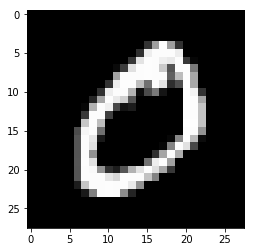

In [0]:
plt.imshow(x_train[y_train==0][0],cmap='gray')

In [0]:
cols=5
rows=10

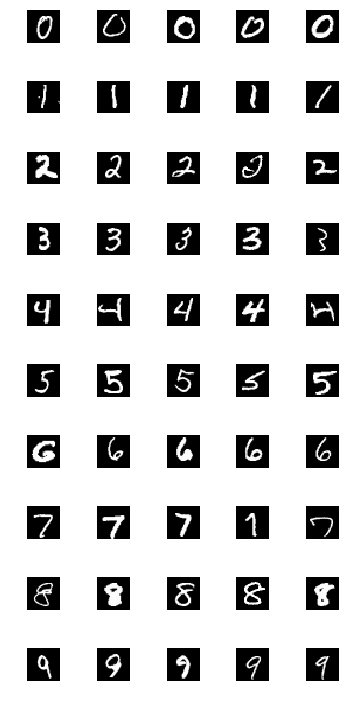

In [0]:
f,a=plt.subplots(10,5,figsize=(5,10))
f.tight_layout()
for i in range(rows):
  for j in range(cols):
    x_selected=x_train[y_train==i]
    a[i][j].imshow(x_selected[random.randint(0,500)],cmap='gray')
    a[i][j].axis("off")
    

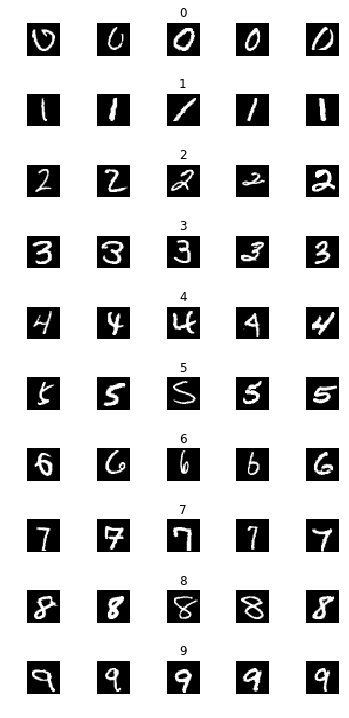

In [0]:
num_classes=10
num_of_samples=[]
cols=5
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()


for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap='gray')
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

In [0]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


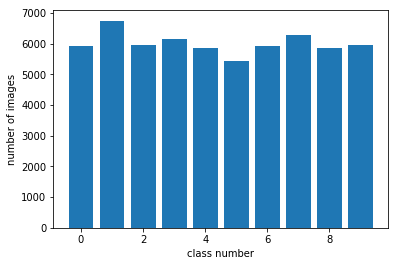

In [0]:
plt.bar(np.arange(0,10),num_of_samples)
plt.xlabel("class number")
plt.ylabel("number of images")
plt.show()

In [0]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [0]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
# Categorical data
  0 1 2 3 4 5 
0 1 0
1 0 1
2 0 0
3 0 0
4 0 0
5 0 0

SyntaxError: ignored

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#normalizing the values
x_train=x_train/255
x_test=x_test/255

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
y_train.shape

(60000, 10)

In [0]:
#convolution shape=shape of img-size of kernel+1
# 28-5+4=24

In [0]:
#dense =connection of one neurons with all other neurons

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
lenet=le_net()
lenet.summary()

W0615 12:44:51.365003 140434246408064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 12:44:51.404088 140434246408064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 12:44:51.411833 140434246408064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 12:44:51.440188 140434246408064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 12:44:51.480471 140434246408064 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
#epocs=no of repetion of an image like in case of 500 img it will work 10 times
#verbose=to switch on visibility of an image
history=lenet.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

W0615 12:44:54.587133 140434246408064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.2645 - acc: 0.9154 - val_loss: 0.0461 - val_acc: 0.9858
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0983 - acc: 0.9716 - val_loss: 0.0385 - val_acc: 0.9885
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0821 - acc: 0.9767 - val_loss: 0.0411 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0748 - acc: 0.9778 - val_loss: 0.0413 - val_acc: 0.9885
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0755 - acc: 0.9769 - val_loss: 0.0366 - val_acc: 0.9907
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0693 - acc: 0.9795 - val_loss: 0.0384 - val_acc: 0.9900
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0696 - acc: 0.9801 - val_loss: 0.0336 - val_acc

Text(0.5, 0, 'epoch')

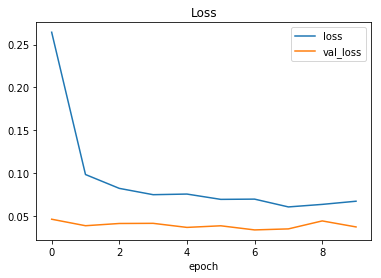

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

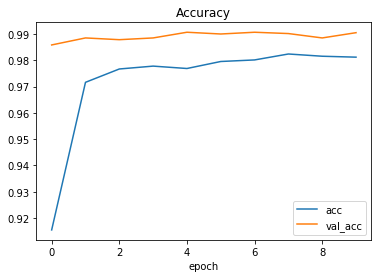

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

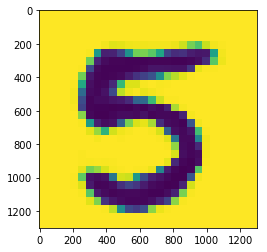

In [0]:
import requests
from PIL import Image

#url ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSn-4Gil2bPEHl0RTl5FvA9v9QRI_PQJxrDByGmbLNBRmzdc_OgTQ'
#url='https://www.google.com/imgres?imgurl=https%3A%2F%2Fraw.githubusercontent.com%2Frohan-varma%2Frohan-blog%2Fmaster%2Fimages%2Fmnistimg.png&imgrefurl=https%3A%2F%2Frohanvarma.me%2FNeural-Net%2F&docid=2n_9UIkO4bhOmM&tbnid=pwMWX5Wtjq6rXM%3A&vet=10ahUKEwirvM7R_-riAhUSk3AKHXNqDCUQMwiqASg_MD8..i&w=586&h=590&bih=657&biw=1366&q=mnist%20dataset&ved=0ahUKEwirvM7R_-riAhUSk3AKHXNqDCUQMwiqASg_MD8&iact=mrc&uact=8'
#url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5tU69uDrQ3c8tJzEh-yEeFypkdXUG8hbuiQrIgIj_6xlZArGI'
url='http://blog.otoro.net/assets/20160401/png/mnist_output_10.png'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

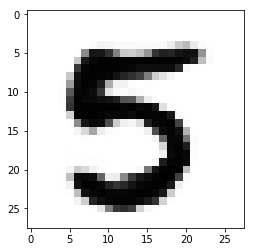

In [0]:
import cv2

img_array  = np.asarray(img)
res = cv2.resize(img_array,(28,28))
plt.imshow(res,cmap=plt.get_cmap('gray'))

In [0]:
res= res/255
image = res.reshape(1,28,28,1)

In [0]:
lenet.predict_classes(image)

array([5])